In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
%matplotlib inline
sns.set_style('darkgrid')

# <a id='0'>Content</a>

- <a href='#1'>About the dataset</a>  
- <a href='#2'>Line Plot</a>
- <a href='#4'>Plot Multiple time series</a>
- <a href='#3'>Seasonal and trend Components</a>
  - <a href='#31'>Visual analysis of Seasonality</a>
- <a href='#5'> Check stationarity visually using rolling mean </a>
- <a href='#7'>References</a>

## <a id='1'> About the dataset </a>

This dataset is originally from the yahoo finance website. For IBM company, 'open', 'high', 'low', 'close', 'adj_close', 'volume' data.

In [37]:
df= pd.read_csv('../Datasets/IBM.csv',parse_dates=[0],infer_datetime_format=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1758 non-null   datetime64[ns]
 1   Open       1758 non-null   float64       
 2   High       1758 non-null   float64       
 3   Low        1758 non-null   float64       
 4   Close      1758 non-null   float64       
 5   Adj Close  1758 non-null   float64       
 6   Volume     1758 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 96.3 KB


In [39]:
df.columns = ['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']

In [42]:
df.head()

,date,open,high,low,close,adj_close,volume
0,2014-01-27,179.610001,179.649994,177.660004,177.899994,135.293381,5208600
1,2014-01-28,178.050003,178.449997,176.160004,176.850006,134.494843,5333300
2,2014-01-29,175.979996,178.529999,175.889999,176.399994,134.152634,4970900
3,2014-01-30,177.169998,177.860001,176.360001,177.360001,134.882690,4853700
4,2014-01-31,176.110001,177.839996,175.339996,176.679993,134.365555,5193400


In [46]:
df = df[df['date']> pd.to_datetime('2018-01-01', format='%Y-%m-%d')]

### <a id='2'>Line Plot</a>

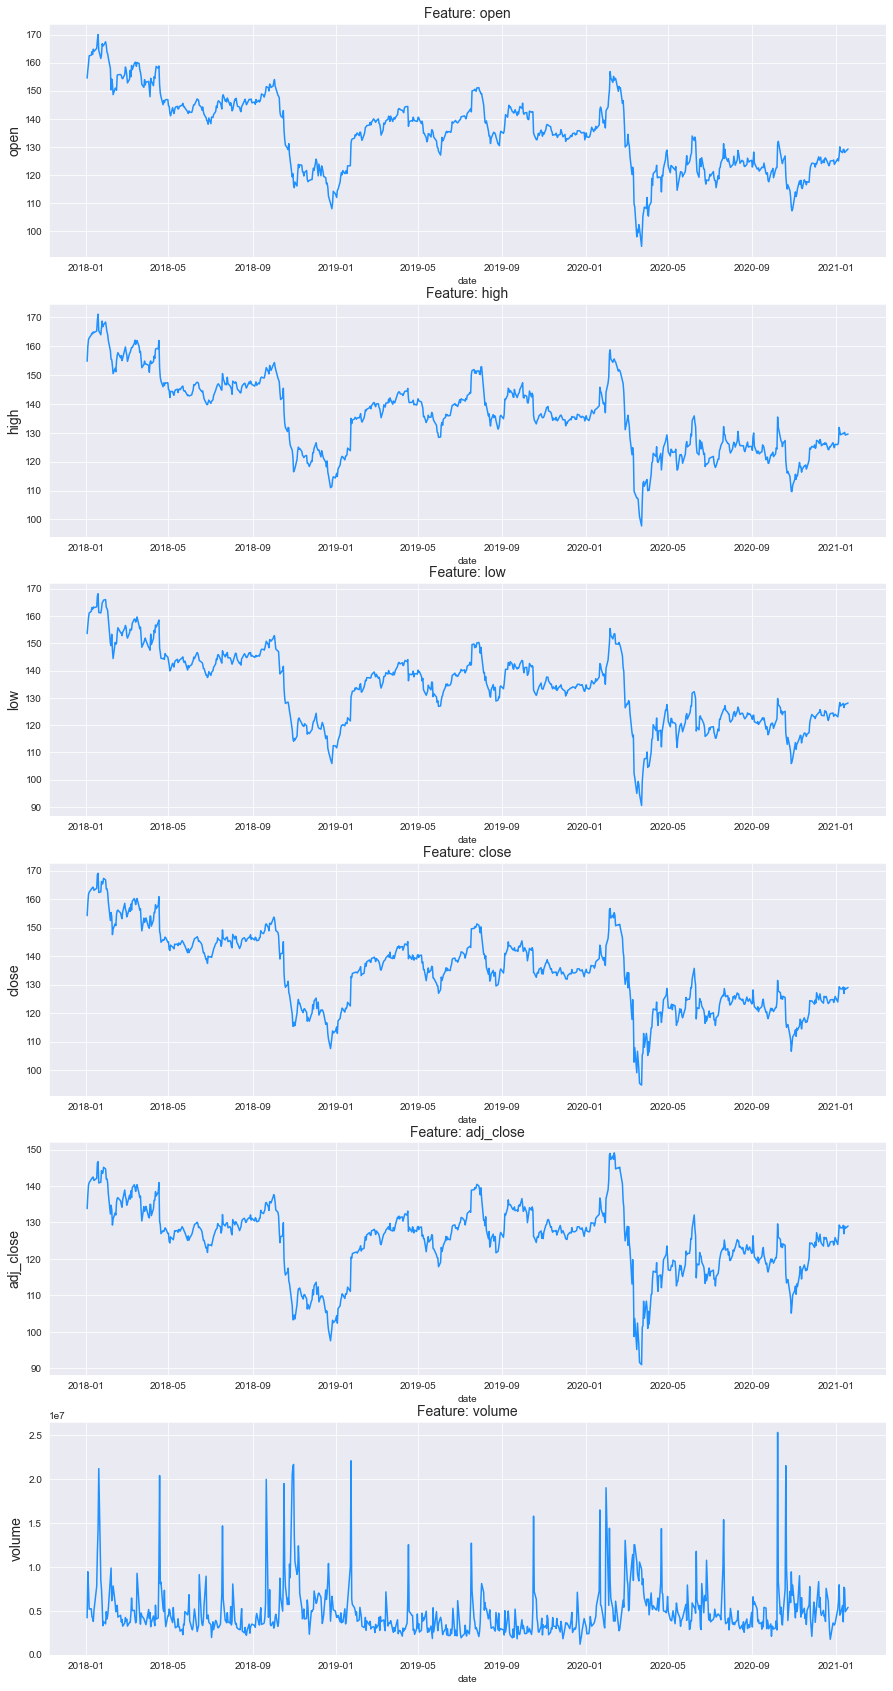

In [52]:
f, ax = plt.subplots(nrows=6, ncols=1, figsize=(15, 30))

for i, col in enumerate(df.drop('date', axis=1).columns):
    sns.lineplot(x='date', y=col,data=df, ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(col), fontsize=14)
    ax[i].set_ylabel(ylabel=col, fontsize=14)

## <a id='4'>Plot Multiple time series</a>

<AxesSubplot:xlabel='date'>

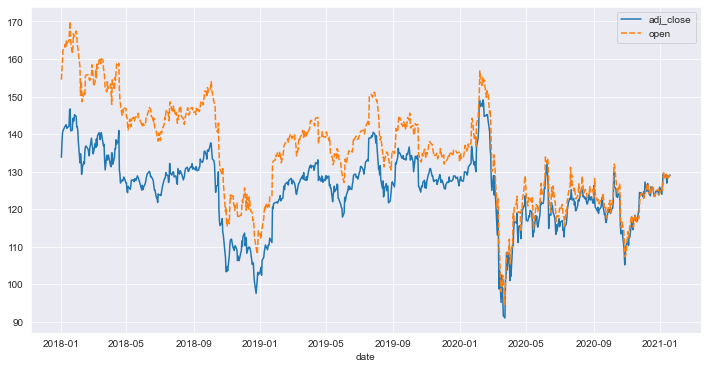

In [80]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df[['adj_close','open','date']].set_index('date'))

## <a id='5'> Check stationarity visually using rolling mean </a>

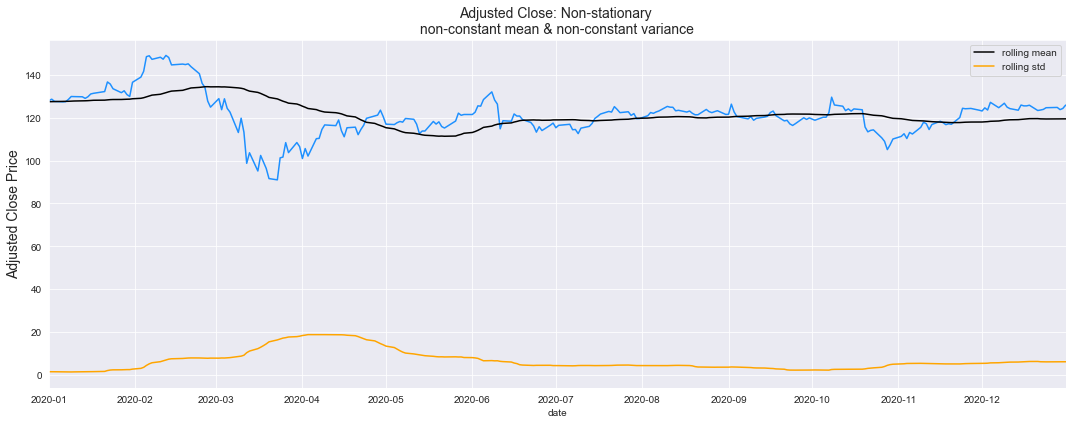

In [59]:
# A year has 52 weeks (52 weeks * 7 days per week) aporx.
rolling_window = 52
f = plt.figure(figsize=(15, 6))
ax = plt.gca()

sns.lineplot(x=df['date'], y=df['adj_close'], color='dodgerblue')
sns.lineplot(x=df['date'], y=df['adj_close'].rolling(rolling_window).mean(),  color='black', label='rolling mean')
sns.lineplot(x=df['date'], y=df['adj_close'].rolling(rolling_window).std(), color='orange', label='rolling std')
ax.set_title('Adjusted Close: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax.set_ylabel(ylabel='Adjusted Close Price', fontsize=14)
ax.set_xlim([pd.to_datetime('2020-01-01', format='%Y-%m-%d'), pd.to_datetime('2020-12-31', format='%Y-%m-%d')])

plt.tight_layout()
plt.show()

## <a id='3'>Seasonal and trend Components</a>

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  ['adj_close','volume']

for column in core_columns:
    decomp = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal

c:\users\rahul agarwal\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """
c:\users\rahul agarwal\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """


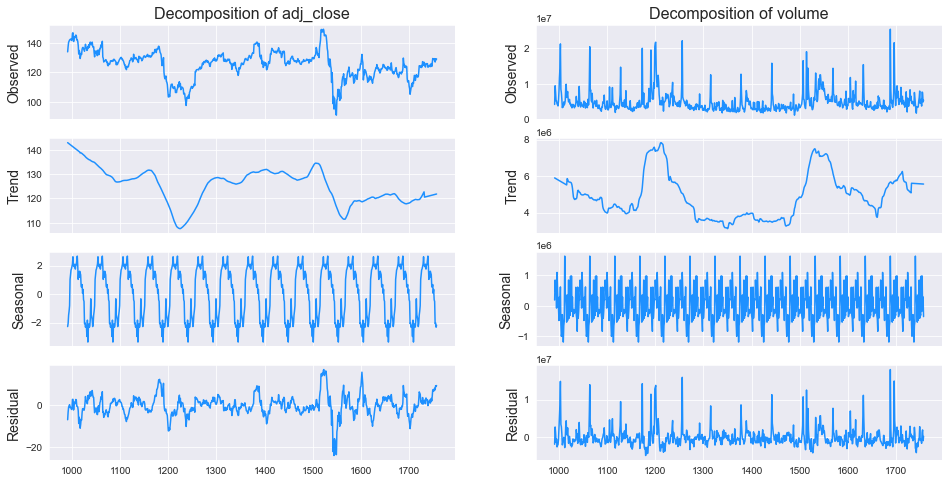

In [63]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['adj_close', 'volume']):
    
    res = seasonal_decompose(df[column], freq=52, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()

### <a id='31'>Visual analysis of Seasonality</a>

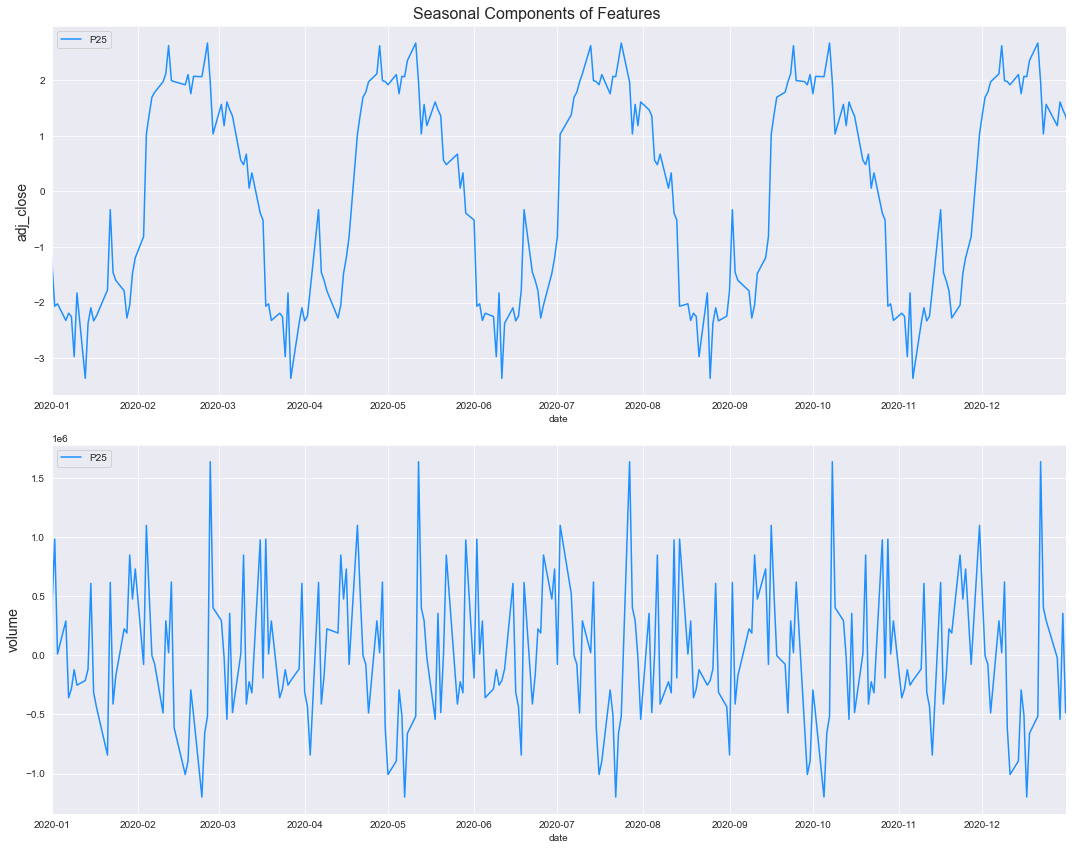

In [65]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))
f.suptitle('Seasonal Components of Features', fontsize=16)

for i, column in enumerate(core_columns):
    sns.lineplot(x=df['date'], y=df[column + '_seasonal'], ax=ax[i], color='dodgerblue', label='P25')
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    ax[i].set_xlim([pd.to_datetime('2020-01-01', format='%Y-%m-%d'), pd.to_datetime('2020-12-31', format='%Y-%m-%d')])
    
plt.tight_layout()
plt.show()

### <a id='7'>Refrences</a>
 - https://www.kaggle.com/andreshg/timeseries-analysis-a-complete-guide